# In All Likelihood (Pawitan, part 1)

## Example 2.12


In [2]:
from scipy.stats import binom
from math import comb

In [5]:
theta = numpy.linspace(0.01, 0.99, 100).astype("float32")
theta_approx = numpy.linspace(-2, 2, 100).astype("float32")

binom_log_dist = binom.pmf(8, 10, theta)
n = 10
x = 8
theta_hat = 0.8
combination = comb(n, x)

log_likeli           = numpy.log(combination) + x * numpy.log(theta) + (n - x) * numpy.log(1 - theta)
log_likeli_theta_hat = numpy.log(combination) + x * numpy.log(theta_hat) + (n - x) * numpy.log(1 - theta_hat)

normalized_log_likeli= log_likeli - log_likeli_theta_hat

# Finding the approximation
observed_fisher = (x/(theta_hat)**2) + (n - x)/(1 - theta_hat)**2
print(observed_fisher)
approximation   = -0.5*observed_fisher * (theta - theta_hat)**2


62.50000000000003


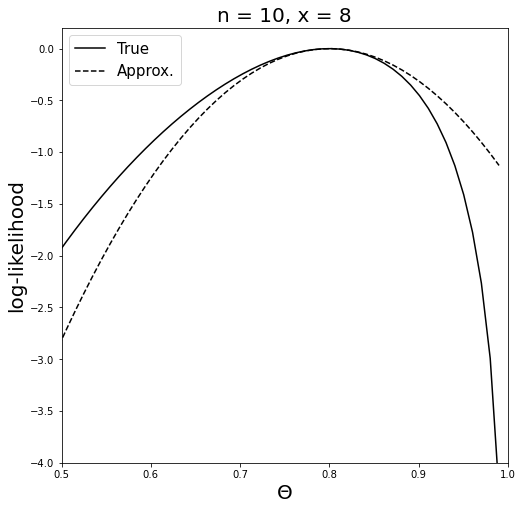

In [6]:
fig, ax    = plt.subplots(1, 1, figsize = (8, 8))

ax.plot(theta, normalized_log_likeli, "k-")
ax.plot(theta, approximation, "k--")

ax.set_xlim(0.5, 1)
ax.set_ylim(-4.0, 0.2)

# ax.grid("True")
ax.set_xlabel(r"$\Theta$", fontsize = 20)
ax.set_ylabel("log-likelihood", fontsize = 20)
ax.set_title("n = 10, x = 8", fontsize = 20)

ax.legend(["True", "Approx."], fontsize = 15)


# Profile likelihood
## Figure 3.1 b

Note: ___Likelihood___ is not a probability density function.

In [2]:
example_3_10 = numpy.array([0.88, 1.07, 1.27, 1.54, 1.91, 2.27, 3.84, 4.50, 4.64, 9.41])

## Profile likelihood

The function below calculates the profile likelihood of $\mu$ of a sample of data from a normal distribution where both $\mu$ and $\sigma^2$ are unknown. Note that to have the profile likelihood of $\mu$ we write $\hat{\sigma}^2$ as a function of $\mu$. By writing this we end up witha constant times $(\hat{\sigma_\mu}^2)^{\large\frac{-n}{2}}$ where the constant is not provided in the book (page 62) but I calculated it and it is equal to $(2\pi)^{\large\frac{-n}{2}} \times exp(\frac{-n}{2})$. It is included in the first function below (i.e. ___profile_likelihood___). Next, we assume that $\sigma^2$ is known and we set it once to 1 and once to the variance of the data set in hand (i.e. ___estimated_likelihood___ function). Note that as the book says setting $\sigma^2 = \hat{\sigma_\mu}^2$ (i.e. variance of the data in hand) is not the same as calculating the profile likelihood. According to Pawitan this is known as ___estimated likelihood___. As is clear from the plot, assuming $\sigma^2 = 1$ gives a very different distribution of $\mu$. In this example, it seems that both the profile likelihood and estimted likelihood are close! 

In [18]:
def profile_likelihood(input_data, mu):
    profile_likelihood_list = []
    n        = input_data.size
    constant = (2 * numpy.pi)**(-0.5 * n) * numpy.exp(-0.5*n)
    for mu_value in mu:
        # Note that likelihood is a function of mean!
        profile_likelihood = ((((input_data - mu_value)**2).sum())/n)**(-0.5*n) * constant
        profile_likelihood_list.append(profile_likelihood)
        
    return numpy.array(profile_likelihood_list)

In [25]:
sample_size                    = 500
mu_range                       = numpy.linspace(0.0, 6.0, sample_size)
normal_data_profile_likelihood = profile_likelihood(example_3_10, mu_range)

In [20]:
def estimated_likelihood(input_data, mu, max_variance):
    
    profile_likelihood_list = []
    n        = input_data.size
    c1       = (2 * numpy.pi * max_variance) ** (-0.5 *  n)
    for mu_value in mu:
        # Note that likelihood is a function of mean!
        profile_likelihood = c1 * numpy.exp((-1/(2*max_variance)) * ((input_data - mu_value)**2).sum())
        profile_likelihood_list.append(profile_likelihood)
        
    return numpy.array(profile_likelihood_list)

In [26]:
sample_size                = 500
mu_range                   = numpy.linspace(0.0, 6.0, sample_size)

profile_likelihood_var_max = estimated_likelihood(example_3_10, mu_range, example_3_10.std()**2)

profile_likelihood_var_one = estimated_likelihood(example_3_10, mu_range, 1)

# profile_likelihood_var_mu_max = estimated_likelihood(example_3_10, mu_range, maximum_variance)


In [5]:
def maximum_sigma(input_data, mu):
    sigma_hat_list = []
    n              = input_data.size
    for mu_value in mu:
        sigma_hat = (((input_data - mu_value)**2).sum())/n
        sigma_hat_list.append(sigma_hat)
        sigma_hat_array = numpy.array(sigma_hat_list)
        
    return sigma_hat_array.max()

In [46]:
sample_size      = 100
mu_range         = numpy.linspace(0.0, 6.0, sample_size)

maximum_variance = maximum_sigma(example_3_10, mu_range)
maximum_variance

15.97781

Text(0, 0.5, 'Normalised likelihood')

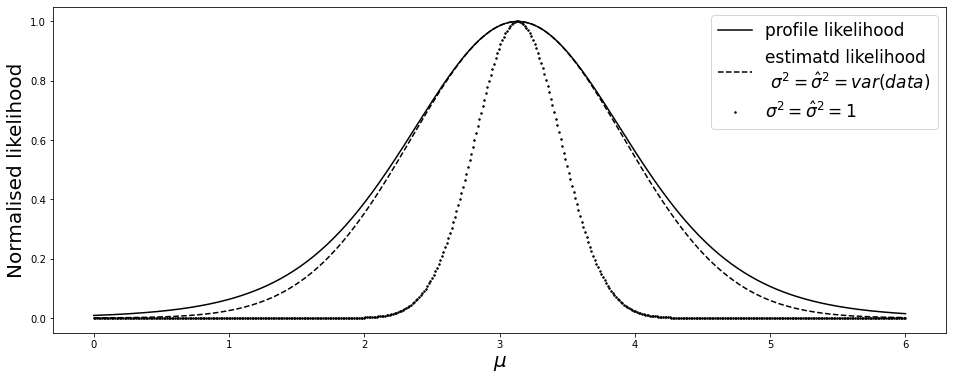

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(mu_range, normal_data_profile_likelihood/normal_data_profile_likelihood.max(), 'k-') 
ax.plot(mu_range, profile_likelihood_var_max/profile_likelihood_var_max.max(), 'k--') 
ax.plot(mu_range, profile_likelihood_var_one/profile_likelihood_var_one.max(), 'k.', markersize = 3) 
# ax.plot(mu_range, profile_likelihood_var_mu_max/profile_likelihood_var_mu_max.max(), 'r-') 

ax.legend(["profile likelihood", "estimatd likelihood\n $\sigma^2 = \hat{\sigma}^2 = var(data)$", \
           "$\sigma^2 = \hat{\sigma}^2 = 1$"], fontsize = 17)

ax.set_xlabel(r"$\mu$", fontsize = 20)
ax.set_ylabel("Normalised likelihood", fontsize = 20)


## Profile likelihood of $\sigma^2$

In [77]:
def profile_likelihood_of_sigma(input_data, sigma_range):
    
    n          = input_data.size
    constant   = (2 * numpy.pi)**(-0.5*n)
    data_mean  = input_data.mean()
    sigma_list = []
    for sigma_value in sigma_range:
        variable      = (sigma_value**(-0.5*n)) * numpy.exp((-1/(2 * sigma_value)) * \
                                                            ((input_data - data_mean)**2).sum())
        profile_sigma = constant * variable
        
        sigma_list.append(profile_sigma)
        
#         print(sigma_value, profile_sigma)
        
    return numpy.array(sigma_list)

In [78]:
sample_size              = 500
sigma_range              = numpy.linspace(0.0001, 20.0, sample_size)

sigma_profile_likelihood = profile_likelihood_of_sigma(example_3_10, sigma_range)

Text(0, 0.5, 'Normalised likelihood')

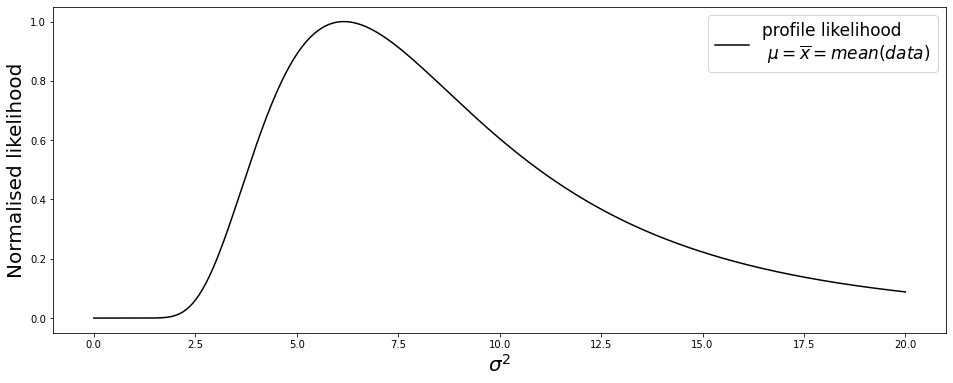

In [79]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.plot(sigma_range, sigma_profile_likelihood/sigma_profile_likelihood.max(), 'k-') 

ax.legend(["profile likelihood\n $\mu = \overline{x} = mean(data)$"], fontsize = 17)

ax.set_xlabel(r"$\sigma^2$", fontsize = 20)
ax.set_ylabel("Normalised likelihood", fontsize = 20)